In [1]:
import pyes
import json

host = '140.118.155.14:9200'

fids = []
fids.append('115361891807579')  #Domino Pizza
fids.append('203507002993446')  #PChome 24h
fids.append('186034394769383')  #Cathaylife

def search(fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    #tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg = pyes.aggs.DateHistogramAgg('month' ,field='created_time', interval='month',sub_aggs=[])
    tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg.sub_aggs.append(tagg) 
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(DHAgg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
    print(json.dumps(result.aggs,indent=2)) 

for i in fids:
    search(i)

pyes object <pyes.es.ES object at 0x0000018BEF96F470> is being destroyed, but bulk operations have not been flushed. Call force_bulk()!


{
  "month": {
    "buckets": [
      {
        "key": 1356998400000,
        "key_as_string": "2013-01-01T00:00:00.000Z",
        "doc_count": 80,
        "pid": {
          "buckets": [
            {
              "key": "115361891807579_545413805469050",
              "doc_count": 28
            },
            {
              "key": "115361891807579_565293593481071",
              "doc_count": 17
            },
            {
              "key": "115361891807579_545054055505025",
              "doc_count": 10
            },
            {
              "key": "115361891807579_539838682693229",
              "doc_count": 9
            },
            {
              "key": "115361891807579_542196989124065",
              "doc_count": 4
            },
            {
              "key": "115361891807579_539291706081260",
              "doc_count": 3
            },
            {
              "key": "115361891807579_548848761792221",
              "doc_count": 3
            },
           

pyes object <pyes.es.ES object at 0x0000018BEF984B00> is being destroyed, but bulk operations have not been flushed. Call force_bulk()!


{
  "month": {
    "buckets": [
      {
        "key": 1349049600000,
        "key_as_string": "2012-10-01T00:00:00.000Z",
        "doc_count": 1,
        "pid": {
          "buckets": [
            {
              "key": "203507002993446_594513803892762",
              "doc_count": 1
            }
          ],
          "doc_count_error_upper_bound": 0,
          "sum_other_doc_count": 0
        }
      },
      {
        "key": 1351728000000,
        "key_as_string": "2012-11-01T00:00:00.000Z",
        "doc_count": 0,
        "pid": {
          "buckets": [],
          "doc_count_error_upper_bound": 0,
          "sum_other_doc_count": 0
        }
      },
      {
        "key": 1354320000000,
        "key_as_string": "2012-12-01T00:00:00.000Z",
        "doc_count": 0,
        "pid": {
          "buckets": [],
          "doc_count_error_upper_bound": 0,
          "sum_other_doc_count": 0
        }
      },
      {
        "key": 1356998400000,
        "key_as_string": "2013-01-01T00:0

pyes object <pyes.es.ES object at 0x0000018BEC04BB38> is being destroyed, but bulk operations have not been flushed. Call force_bulk()!


{
  "month": {
    "buckets": [
      {
        "key": 1349049600000,
        "key_as_string": "2012-10-01T00:00:00.000Z",
        "doc_count": 3,
        "pid": {
          "buckets": [
            {
              "key": "186034394769383_491469980892488",
              "doc_count": 3
            }
          ],
          "doc_count_error_upper_bound": 0,
          "sum_other_doc_count": 0
        }
      },
      {
        "key": 1351728000000,
        "key_as_string": "2012-11-01T00:00:00.000Z",
        "doc_count": 2,
        "pid": {
          "buckets": [
            {
              "key": "186034394769383_491469980892488",
              "doc_count": 2
            }
          ],
          "doc_count_error_upper_bound": 0,
          "sum_other_doc_count": 0
        }
      },
      {
        "key": 1354320000000,
        "key_as_string": "2012-12-01T00:00:00.000Z",
        "doc_count": 1,
        "pid": {
          "buckets": [
            {
              "key": "186034394769383_491

In [2]:
import numpy as np
import pandas as pd

from bokeh.plotting import figure, show, output_file

# generate some synthetic time series for six different categories
cats = list("abcdef")
yy = np.random.randn(2000)
g = np.random.choice(cats, 2000)
for i, l in enumerate(cats):
    yy[g == l] += i // 2
df = pd.DataFrame(dict(score=yy, group=g))

# find the quartiles and IQR for each category
groups = df.groupby('group')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.score > upper.loc[cat]['score']) | (group.score < lower.loc[cat]['score'])]['score']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = []
    outy = []
    for cat in cats:
        # only add outliers if they exist
        if not out.loc[cat].empty:
            for value in out[cat]:
                outx.append(cat)
                outy.append(value)

p = figure(tools="save", background_fill_color="#EFE8E2", title="", x_range=cats)

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.score = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'score']),upper.score)]
lower.score = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'score']),lower.score)]

# stems
p.segment(cats, upper.score, cats, q3.score, line_width=2, line_color="black")
p.segment(cats, lower.score, cats, q1.score, line_width=2, line_color="black")

# boxes
p.rect(cats, (q3.score+q2.score)/2, 0.7, q3.score-q2.score,
    fill_color="#E08E79", line_width=2, line_color="black")
p.rect(cats, (q2.score+q1.score)/2, 0.7, q2.score-q1.score,
    fill_color="#3B8686", line_width=2, line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(cats, lower.score, 0.2, 0.01, line_color="black")
p.rect(cats, upper.score, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="12pt"

output_file("boxplot.html", title="boxplot.py example")

show(p)

In [3]:
out

group      
a      1213    2.796007
       1319   -3.049458
b      1021    2.561610
       1281    2.602194
c      819    -2.185058
       1005   -1.854876
       1438   -2.239239
d      931    -1.364153
       1040   -1.672994
       1053   -1.416373
e      108    -0.695866
       1697   -0.438487
f      1067   -2.126561
       1107    4.505349
       1316   -1.007847
Name: score, dtype: float64

In [4]:
groups

In [5]:
df

,group,score
0,f,2.267599
1,d,1.687849
2,c,0.053674
3,f,1.922611
4,f,1.441601
5,f,1.241648
6,b,-1.288610
7,b,0.723215
8,b,-0.899004
9,b,0.234814


In [6]:
%matplotlib inline

import pyes
import json
import pandas as pd
import seaborn as sns

def boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter):
    data=[]
    for fid in fids:
        conn = pyes.es.ES(host)
        tq = pyes.query.TermQuery(field="fid", value=fid)
        tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
        qsearch = pyes.query.Search(tq) 
        qsearch.agg.add(tagg) 
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
        #print json.dumps(result.aggs,indent=2) 
        for fidpid_summary in result.aggs["pid"]["buckets"]:
            #print fidpid_summary["key"] + ',' + str(fidpid_summary["doc_count"])
            if fidpid_summary["doc_count"] < outlierFilter or outlierFilter < 0:
                data.append([fidpid_summary["doc_count"],fid,fidpid_summary["key"]])

    df=pd.DataFrame(data,columns={'count','fid','fidpid'})
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="fid", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    fig.savefig(pngFilePath)

ERROR:pyes:pyes object <pyes.es.ES object at 0x0000018BEFAF8D30> is being destroyed, but bulk operations have not been flushed. Call force_bulk()!
ERROR:pyes:pyes object <pyes.es.ES object at 0x0000018BEFAF8B70> is being destroyed, but bulk operations have not been flushed. Call force_bulk()!


TypeError: unsupported operand type(s) for /: 'str' and 'int'

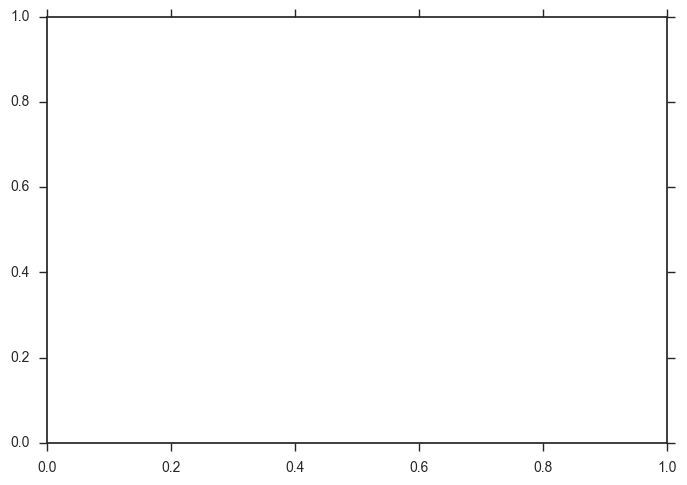

In [7]:
#output box plot PNG figure
pngFilePath="output.png"

#outlier threshold you want to filter (if you give minus ONE, none of outlier is filtered.)
outlierFilter=2000

#obtain the result and save as "pngFilePath" given from you
boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter)

In [ ]:
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


def boxPlotNumofPostPerMonth(fid,host,lowerbound,upperbound,pngFilePath):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    #tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg = pyes.aggs.DateHistogramAgg('month' ,field='created_time', interval='month',sub_aggs=[])
    tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg.sub_aggs.append(tagg) 
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(DHAgg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')

    data=[]
    for r in result.aggs["month"]["buckets"]:
        for pid in r["pid"]["buckets"]:
            monthyear=datetime.datetime.strptime(r["key_as_string"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime('%Y/%m')
            data.append([pid["doc_count"],monthyear,pid["key"],r["key"]])

    df=pd.DataFrame(data,columns={'date','count','fid','pid'})
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="date", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    plt.ylim(lower_bound, upper_bound)
    fig.savefig(pngFilePath)

In [ ]:
lower_bound = 0
upper_bound = 500
fid=fids[0]
pngFilePath="output3.png"
boxPlotNumofPostPerMonth(fid,host,lower_bound,upper_bound,pngFilePath)

In [ ]:
lower_bound = 0
upper_bound = 500
fid=fids[1]
pngFilePath="output4.png"
boxPlotNumofPostPerMonth(fid,host,lower_bound,upper_bound,pngFilePath)

In [ ]:
lower_bound = 0
upper_bound = 500
fid=fids[2]
pngFilePath="output4.png"
boxPlotNumofPostPerMonth(fid,host,lower_bound,upper_bound,pngFilePath)

In [ ]:
import pyes
import json

def getUserPostFreqMatrix(es_address,row,column,fid):
    rc=200
    cc=200
    
    rowIndexList,colIndexList,matrix = [],[],[]
    conn=pyes.es.ES(es_address)
    tq = pyes.query.TermQuery(field="fid", value=fid)

    tagg = pyes.aggs.TermsAgg(row, field= r, sub_aggs=[]) 
    tagg1 = pyes.aggs.TermsAgg(column, field= c)  
    tagg.sub_aggs.append(tagg1) 

    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(tagg)

    rs = conn.search(query=qsearch, indices='facebook_nested' ,type="comment" )
    
    rowcount=0
    colcount=0
    for user in rs.aggs[row]['buckets']:
        if user['key']!="" and user['key'] not in rowIndexList and rowcount<rc:
            rowIndexList.append(user['key'])
            rowcount=rowcount+1

        for post in user[column]['buckets']:
            if post['key'] not in colIndexList and colcount<cc:
                colIndexList.append(post['key'])
                colcount=colcount+1

    for i in range(0,len(rowIndexList)):
        matrix.append([0.0]*len(colIndexList))

    for user in rs.aggs[row]['buckets']:
        if user["key"] in rowIndexList:
            for post in user[column]['buckets']:
                if post['key'] in colIndexList:
                    matrix[rowIndexList.index(user['key'])][colIndexList.index(post['key'])]= float(post['doc_count'])
    
    
    return {"data":matrix,"col":colIndexList,"row":rowIndexList}

In [ ]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
d = pd.DataFrame(data=result["data"],
                 columns=result["col"])

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

result["row"]